     0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3

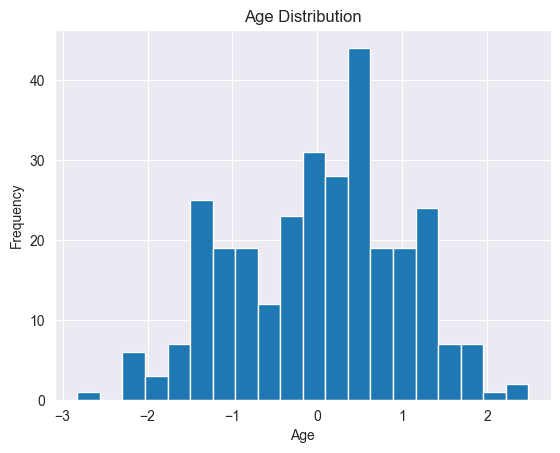

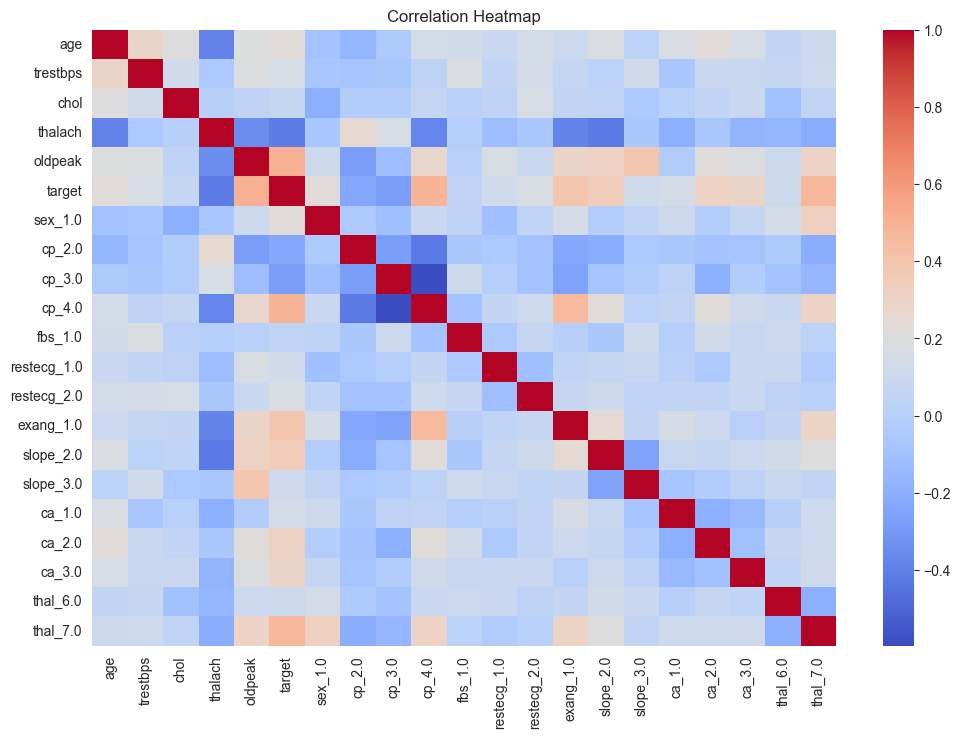

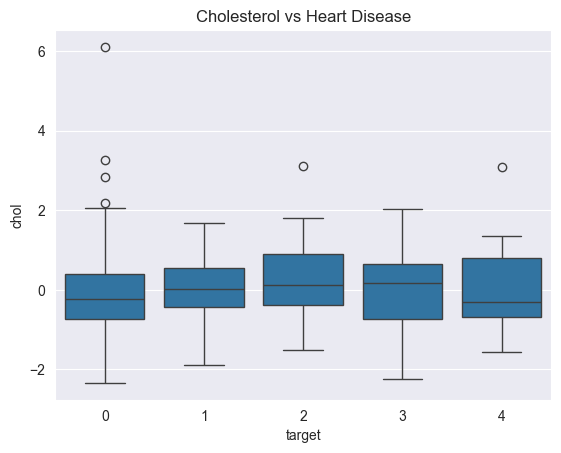

        age  trestbps      chol   thalach   oldpeak  target  sex_1.0  cp_2.0  \
0  0.936181  0.750380 -0.276443  0.017494  1.068965       0     True   False   
1  1.378929  1.596266  0.744555 -1.816334  0.381773       2     True   False   
2  1.378929 -0.659431 -0.353500 -0.899420  1.326662       1     True   False   
3 -1.941680 -0.095506  0.051047  1.633010  2.099753       0     True   False   
4 -1.498933 -0.095506 -0.835103  0.978071  0.295874       0    False    True   

   cp_3.0  cp_4.0  ...  restecg_1.0  restecg_2.0  exang_1.0  slope_2.0  \
0   False   False  ...        False         True      False      False   
1   False    True  ...        False         True       True       True   
2   False    True  ...        False         True       True       True   
3    True   False  ...        False        False      False      False   
4   False   False  ...        False         True      False      False   

   slope_3.0  ca_1.0  ca_2.0  ca_3.0  thal_6.0  thal_7.0  
0       True   

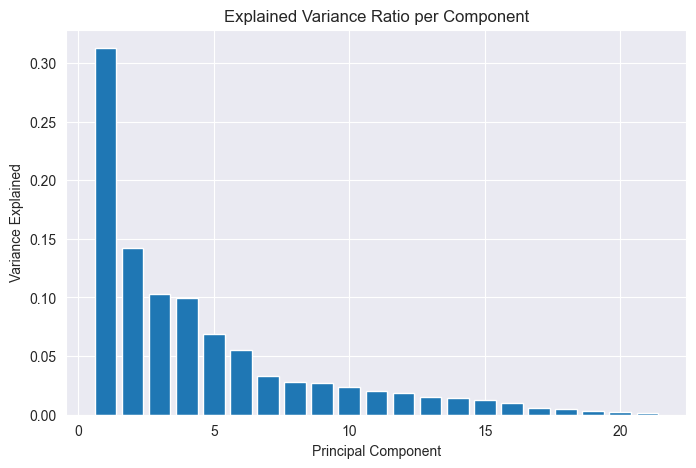

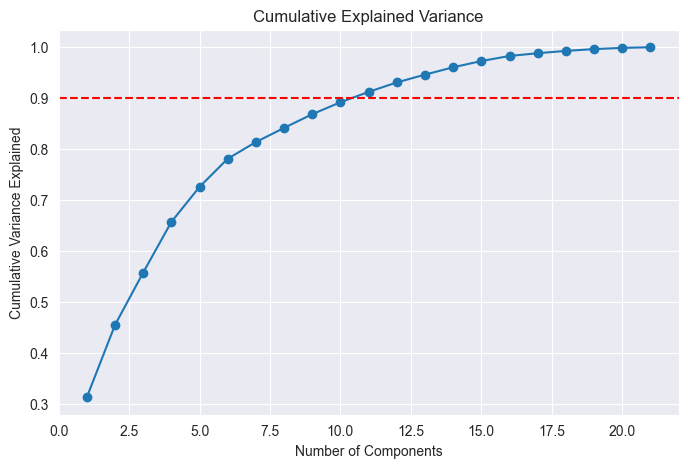

     Feature  Importance
7    thalach    0.138926
9    oldpeak    0.117851
0        age    0.115244
4       chol    0.113633
3   trestbps    0.099319
11        ca    0.094761
12      thal    0.082430
2         cp    0.075682
8      exang    0.046423
10     slope    0.042554


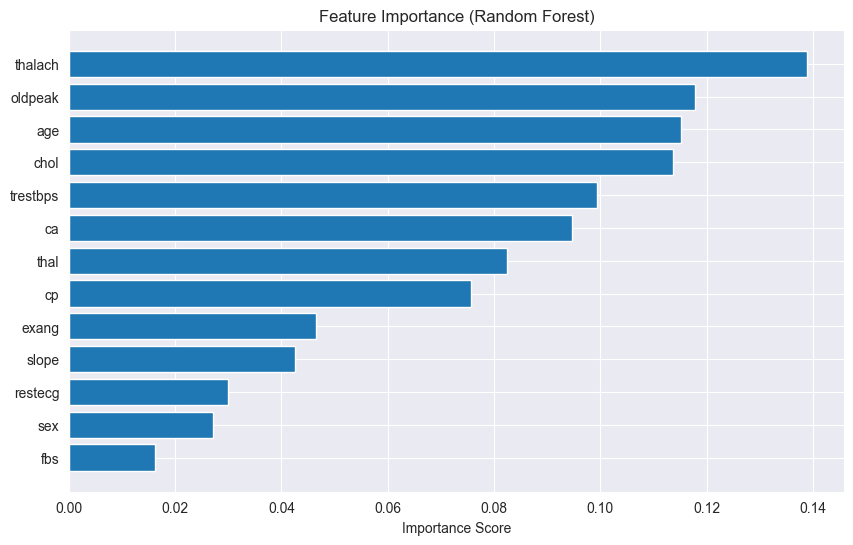

Selected Features via RFE: ['age', 'sex', 'cp', 'fbs', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
dtype: object
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
dtype: object
Selected Features via Chi-Square: ['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']
Final Selected Features: ['thalach', 'thal', 'trestbps', 'exang', 'fbs', 'age', 'oldpeak', 'chol', 'cp', 'restecg', 'slope', 'ca', 'sex']
Reduced dataset shape: (297, 13)


In [1]:
%run 03_feature_selection.ipynb


In [2]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_reduced , y, test_size=0.2, random_state=42, stratify=y)

print("training set shape:", x_train.shape)
print("test set shape:", x_test.shape)


training set shape: (237, 13)
test set shape: (60, 13)


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86        32
           1       0.50      0.27      0.35        11
           2       0.00      0.00      0.00         7
           3       0.33      0.43      0.38         7
           4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.32      0.33      0.32        60
weighted avg       0.55      0.60      0.57        60

Accuracy: 0.6
Precision (macro): 0.32456140350877194
Recall (macro): 0.32775974025974025
F1 score (macro): 0.31701680672268906
ROC AUC (OvR, macro): 0.8185371190959307


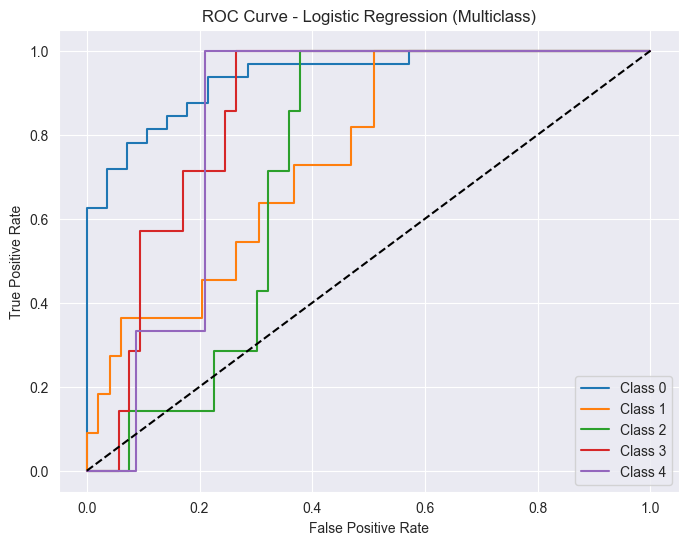

In [3]:
# Logistic Regression Model (Multiclass)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


# Train the model
log_reg = LogisticRegression(max_iter=100000)
log_reg.fit(x_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(x_test_scaled)
y_prob = log_reg.predict_proba(x_test_scaled)

# Classification report
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))

# Metrics (multiclass averages)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average="macro"))
print("Recall (macro):", recall_score(y_test, y_pred, average="macro"))
print("F1 score (macro):", f1_score(y_test, y_pred, average="macro"))

# ROC AUC (multiclass - OvR)
print("ROC AUC (OvR, macro):", roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro"))

# ROC Curve for multiclass
fpr = {}
tpr = {}
plt.figure(figsize=(8,6))

for i in range(len(log_reg.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == log_reg.classes_[i], y_prob[:, i])
    plt.plot(fpr[i], tpr[i], label=f"Class {log_reg.classes_[i]}")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (Multiclass)")
plt.legend()
plt.show()


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78        32
           1       0.28      0.45      0.34        11
           2       0.14      0.14      0.14         7
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.48        60
   macro avg       0.25      0.26      0.25        60
weighted avg       0.52      0.48      0.50        60

Accuracy: 0.48333333333333334
Precision (macro): 0.2544973544973545
Recall (macro): 0.26323051948051945
F1 score (macro): 0.25346914920263836
ROC AUC (OvR, macro): 0.5645162453579428


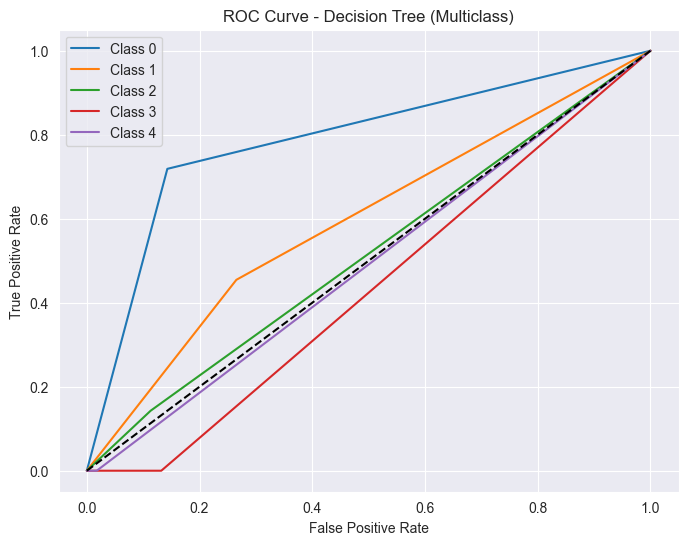

In [4]:
#Decision tree model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report,roc_curve
import matplotlib.pyplot as plt

#train the model
Dec_tree = DecisionTreeClassifier()
Dec_tree.fit(x_train_scaled, y_train)

#predictions
y_pred = Dec_tree.predict(x_test_scaled)
y_prob = Dec_tree.predict_proba(x_test_scaled)

#Report
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average="macro"))
print("Recall (macro):", recall_score(y_test, y_pred, average="macro"))
print("F1 score (macro):", f1_score(y_test, y_pred, average="macro"))


# ROC AUC (multiclass - OvR)
print("ROC AUC (OvR, macro):", roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro"))

# ROC Curve for multiclass
fpr = {}
tpr = {}
plt.figure(figsize=(8,6))

for i in range(len(Dec_tree.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == Dec_tree.classes_[i], y_prob[:, i])
    plt.plot(fpr[i], tpr[i], label=f"Class {Dec_tree.classes_[i]}")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree (Multiclass)")
plt.legend()
plt.show()



{np.int64(0): np.int64(32), np.int64(1): np.int64(11), np.int64(2): np.int64(7), np.int64(3): np.int64(7), np.int64(4): np.int64(3)}


C:\Users\Alyaa\PycharmProjects\Heart_Disease\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Alyaa\PycharmProjects\Heart_Disease\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Alyaa\PycharmProjects\Heart_Disease\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86        32
           1       0.20      0.18      0.19        11
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.57        60
   macro avg       0.19      0.24      0.21        60
weighted avg       0.44      0.57      0.50        60

Accuracy: 0.5666666666666667
Precision (macro): 0.19238095238095237
Recall (macro): 0.2363636363636364
F1 score (macro): 0.21106821106821108
ROC AUC (OvR, macro): 0.7957078689165021


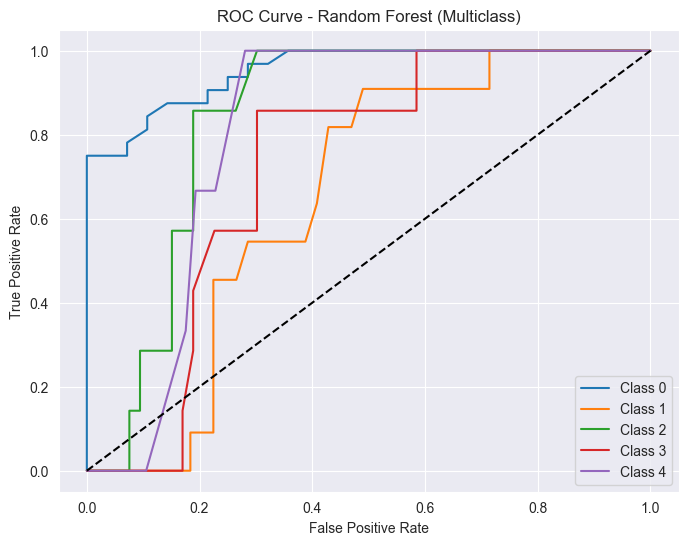

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt
import numpy as np


unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))

# Train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train_scaled, y_train)

# Predictions
y_pred = rf.predict(x_test_scaled)
y_prob = rf.predict_proba(x_test_scaled)

# Report
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average="macro", zero_division=0))
print("Recall (macro):", recall_score(y_test, y_pred, average="macro", zero_division=0))
print("F1 score (macro):", f1_score(y_test, y_pred, average="macro", zero_division=0))

# ROC AUC (multiclass OvR)
print("ROC AUC (OvR, macro):", roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro"))

# ROC Curve
fpr = {}
tpr = {}
plt.figure(figsize=(8,6))

for i in range(len(rf.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == rf.classes_[i], y_prob[:, i])
    plt.plot(fpr[i], tpr[i], label=f"Class {rf.classes_[i]}")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (Multiclass)")
plt.legend()
plt.show()


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89        32
           1       0.27      0.27      0.27        11
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.58        60
   macro avg       0.21      0.25      0.23        60
weighted avg       0.48      0.58      0.52        60

Accuracy: 0.5833333333333334
Precision (macro): 0.21454545454545454
Recall (macro): 0.2545454545454545
F1 score (macro): 0.23232323232323232
ROC AUC (OvR, macro): 0.8423536059273399


C:\Users\Alyaa\PycharmProjects\Heart_Disease\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Alyaa\PycharmProjects\Heart_Disease\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Alyaa\PycharmProjects\Heart_Disease\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

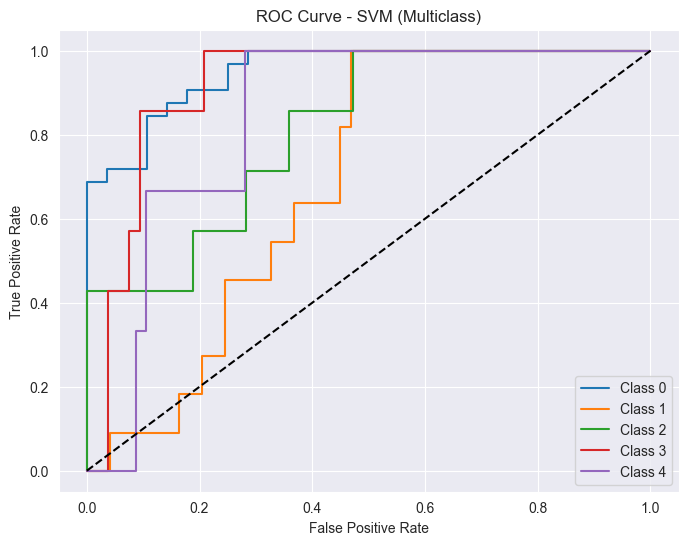

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt

# Train the model
svm = SVC(probability=True, random_state=42)
svm.fit(x_train_scaled, y_train)

# Predictions
y_pred = svm.predict(x_test_scaled)
y_prob = svm.predict_proba(x_test_scaled)

# Report
print("SVM Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average="macro"))
print("Recall (macro):", recall_score(y_test, y_pred, average="macro"))
print("F1 score (macro):", f1_score(y_test, y_pred, average="macro"))

# ROC AUC (multiclass OvR)
print("ROC AUC (OvR, macro):", roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro"))

# ROC Curve
fpr = {}
tpr = {}
plt.figure(figsize=(8,6))

for i in range(len(svm.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == svm.classes_[i], y_prob[:, i])
    plt.plot(fpr[i], tpr[i], label=f"Class {svm.classes_[i]}")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM (Multiclass)")
plt.legend()
plt.show()
